In [81]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [82]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [83]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [84]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [85]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [86]:
tf.keras.backend.clear_session()

In [87]:
subject = 'Pernambuco - Consumo de Cimento (t)'
start_index = 0
split_index = 191 #Referente aos 230 anos de input 
window_size = 36
train_split = split_index + 1 - 30

In [88]:
data = pd.read_csv('2003_mo_model_input_PE.csv')
pd.set_option('display.max_columns', None)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Pernambuco - Consumo de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,99.743,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,86.997,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,83.033,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,82.302,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,80.217,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


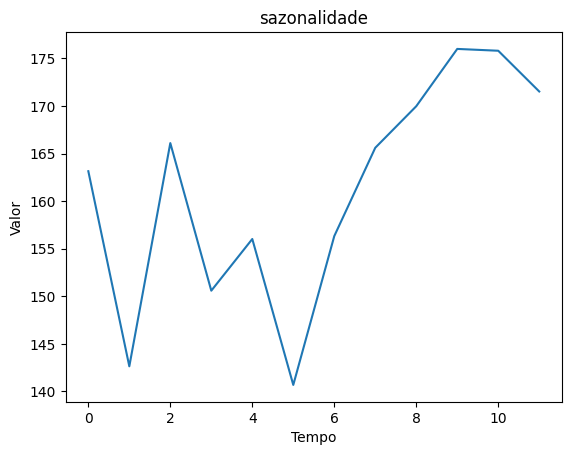

,sazonalidade
sazonalidade,
0,163.149929
1,142.635453
2,166.107737
3,150.589369
4,156.022401
5,140.680786
6,156.326833
7,165.613637
8,169.982054


In [89]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [90]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Fluxo Mensal (Milhões de reais),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,2.096826,1012.239458,1768.569550,25.820814,20.730423,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,-5331.049150,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.765509,163.149929,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,2.096788,1012.240419,1767.661814,25.820777,20.733369,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,-5318.079644,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.765971,142.635453,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,2.096740,1012.240980,1767.132301,25.820756,20.735088,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,-5436.417870,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.766434,166.107737,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,2.096680,1012.241040,1767.075567,25.820754,20.735272,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,-5707.015274,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.766896,150.589369,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,2.076740,1012.120648,1783.069193,25.939427,20.766986,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,-5599.317941,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.767358,156.022401,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.022401,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.680786,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.326833,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.613637,NaN


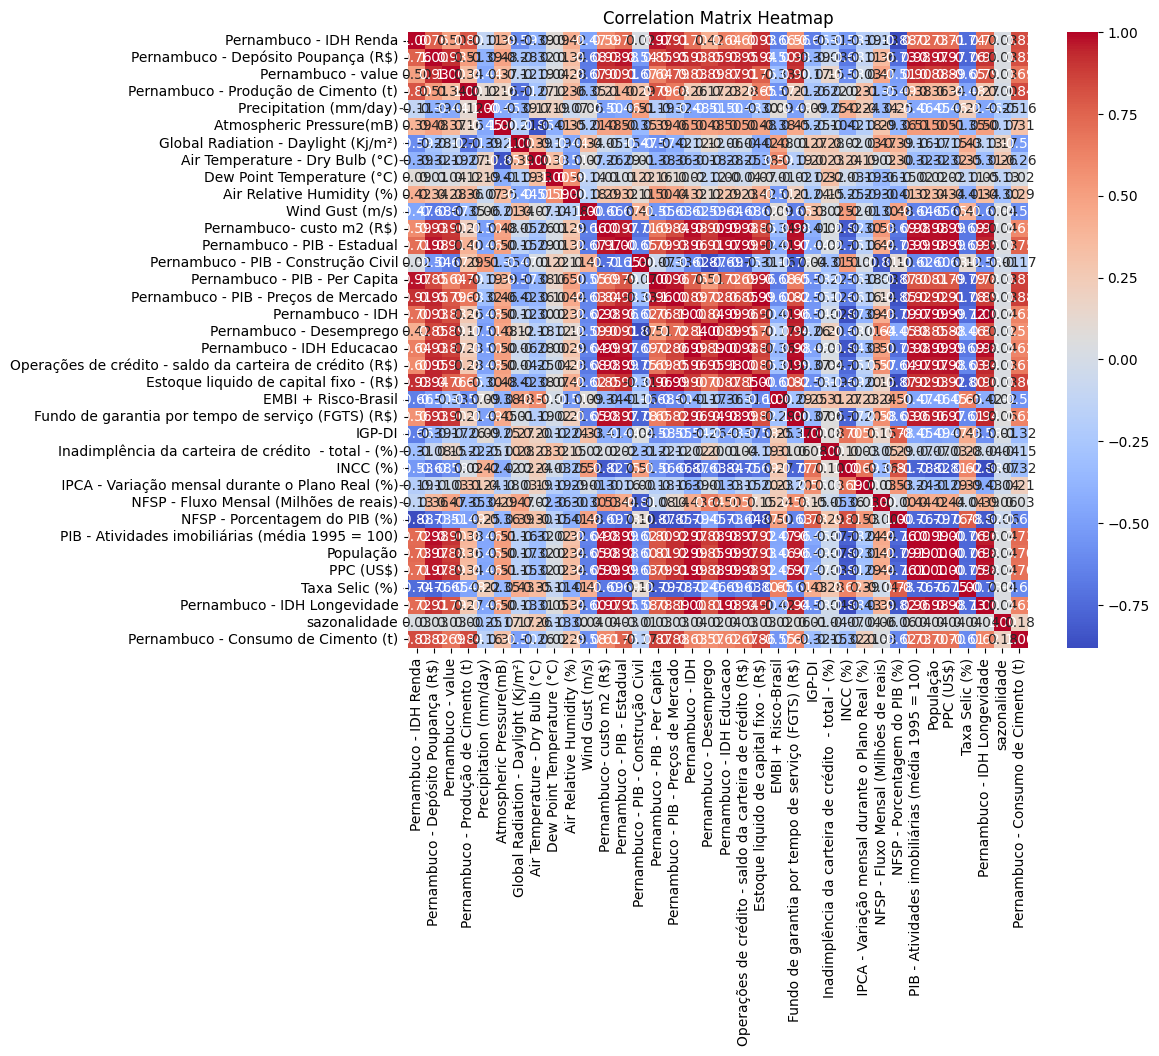

In [91]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [92]:
data =data.drop(['Precipitation (mm/day)', 
                 'Dew Point Temperature (°C)', 
                 ' NFSP - Fluxo Mensal (Milhões de reais)',
                 'PPC (US$)',
                 'População'], axis=1)
data

,Unnamed: 0,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade,Pernambuco - Consumo de Cimento (t)
0,2003-1,0.659695,5.799059e+06,0.297418,34.266080,1012.239458,1768.569550,25.820814,73.547765,2.408009,10666.238800,8.237381e+07,5.574893e+06,8.646979,7.571061e+07,0.688685,8.294029,0.635245,384683.093871,7.330309e+06,231.510748,2.097001e+06,1.036534,3.656420,0.969649,0.724032,11.520143,126.459809,1.611498,0.765509,163.149929,99.743
1,2003-2,0.659840,5.821974e+06,0.298912,34.126272,1012.240419,1767.661814,25.820777,73.564536,2.408009,10766.569569,8.248102e+07,5.580364e+06,8.650960,7.575437e+07,0.689009,8.288006,0.635703,385266.203928,7.335910e+06,208.710157,2.000523e+06,0.993449,3.654697,0.950783,0.690297,11.189862,126.581813,1.450389,0.765971,142.635453,86.997
2,2003-3,0.659986,5.844889e+06,0.300346,34.414272,1012.240980,1767.132301,25.820756,73.574319,2.408009,10861.937347,8.258823e+07,5.585835e+06,8.654941,7.579812e+07,0.689334,8.281983,0.636160,385305.059560,7.341511e+06,227.704841,1.963278e+06,0.973020,3.654266,0.938332,0.669681,10.820792,126.703818,1.870184,0.766434,166.107737,83.033
3,2003-4,0.660131,5.867804e+06,0.301729,34.576094,1012.241040,1767.075567,25.820754,73.575367,2.408009,10953.794847,8.269544e+07,5.591305e+06,8.658922,7.584188e+07,0.689658,8.275960,0.636618,385752.052697,7.347112e+06,278.121073,1.954187e+06,0.940489,3.653595,0.926401,0.660494,10.417840,126.825822,1.355287,0.766896,150.589369,82.302
4,2003-5,0.660277,5.890719e+06,0.302368,34.890197,1012.120648,1783.069193,25.939427,73.233157,2.418925,11040.490019,8.280265e+07,5.596776e+06,8.662903,7.588563e+07,0.689983,8.269937,0.637075,387164.022451,7.352713e+06,344.827633,1.975493e+06,0.917493,3.650266,0.951683,0.648337,9.959690,126.976217,1.585538,0.767358,156.022401,80.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36296.187024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.022401,NaN
245,2023-6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36276.684662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140.680786,NaN
246,2023-7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36211.583947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.326833,NaN
247,2023-8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36119.315381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.613637,NaN


In [93]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-2.788164,-1.615901,-1.011454,-1.188910,-0.189205,0.484623,-0.180790,-0.532666,0.850963,-1.625104,-1.754154,-0.181030,-2.511326,-2.321118,-2.100972,-0.864836,-1.816917,-1.361787,-2.389042,-0.582420,-1.347324,3.890153,1.258423,3.122582,2.723741,4.398348,-1.873379,2.132459,-2.240586,0.168807
1,-2.725046,-1.607212,-0.964614,-1.195377,-0.188384,0.480777,-0.180834,-0.529009,0.850963,-1.602608,-1.734705,-0.148206,-2.462275,-2.280399,-2.067858,-0.866889,-1.795100,-1.361224,-2.352139,-0.799075,-1.380245,3.551840,1.252755,2.970356,2.350880,4.222509,-1.868164,1.592202,-2.201527,-1.611769
2,-2.661927,-1.598523,-0.919667,-1.182056,-0.187906,0.478533,-0.180859,-0.526876,0.850963,-1.581225,-1.715257,-0.115382,-2.413223,-2.239680,-2.034743,-0.868942,-1.773282,-1.361187,-2.315236,-0.618584,-1.392954,3.391423,1.251338,2.869895,2.123016,4.026019,-1.862949,2.999926,-2.162469,0.425533
3,-2.598809,-1.589835,-0.876288,-1.174571,-0.187855,0.478293,-0.180862,-0.526647,0.850963,-1.560629,-1.695809,-0.082559,-2.364172,-2.198961,-2.001628,-0.870995,-1.751464,-1.360756,-2.278333,-0.139520,-1.396056,3.135979,1.249134,2.773628,2.021477,3.811492,-1.857734,1.273293,-2.123411,-0.921400
4,-2.535691,-1.581146,-0.856283,-1.160042,-0.290578,0.546059,-0.039709,-0.601265,0.871099,-1.541191,-1.676361,-0.049735,-2.315120,-2.158242,-1.968514,-0.873048,-1.729646,-1.359394,-2.241431,0.494336,-1.388786,2.955412,1.238186,2.977624,1.887113,3.567576,-1.851305,2.045407,-2.084352,-0.449835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-0.437943,1.073768,1.720800,-1.281757,1.131294,0.968641,-0.780141,0.012437,-0.602572,1.683069,1.016740,-1.416488,-0.070259,0.355961,1.324101,1.183158,1.435784,1.316363,0.389193,-0.244459,1.237409,0.589021,-0.685819,-1.749976,-2.010387,-0.572934,1.406756,-1.311366,1.249488,0.382647
188,-0.456323,1.080605,1.802101,-1.271596,0.676815,0.912543,-0.239952,-0.330236,-0.470566,1.699936,1.004554,-1.402870,-0.093306,0.336941,1.314733,1.181904,1.430451,1.330590,0.370392,-0.199028,1.214214,1.043728,-0.770458,-1.593005,-1.870713,-0.588777,1.428132,-1.417143,1.237822,0.761808
189,-0.474703,1.087443,1.813469,-1.268136,0.408500,0.827147,0.231997,-0.503124,-0.411457,1.720341,0.992368,-1.389252,-0.116354,0.317922,1.305366,1.180650,1.425118,1.352241,0.351592,-0.173807,1.409043,1.387010,-0.910077,-1.351489,-1.806230,-0.612606,1.449507,-1.597784,1.226156,1.284699
190,-0.493082,1.094280,1.843043,-1.270527,0.081432,0.770903,0.576277,-0.401439,-0.473069,1.744402,0.980182,-1.375634,-0.139402,0.298902,1.295999,1.179397,1.419785,1.370978,0.332791,-0.169867,1.654237,1.815728,-1.020687,-1.198492,-1.727496,-0.640956,1.463901,-1.400787,1.214489,1.268077


In [94]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-12)
target_data

0      76.341
1      65.040
2      88.306
3      74.323
4      78.114
        ...  
244       NaN
245       NaN
246       NaN
247       NaN
248       NaN
Name: Pernambuco - Consumo de Cimento (t), Length: 249, dtype: float64

In [95]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
0,-2.788164,-1.615901,-1.011454,-1.188910,-0.189205,0.484623,-0.180790,-0.532666,0.850963,-1.625104,-1.754154,-0.181030,-2.511326,-2.321118,-2.100972,-0.864836,-1.816917,-1.361787,-2.389042,-0.582420,-1.347324,3.890153,1.258423,3.122582,2.723741,4.398348,-1.873379,2.132459,-2.240586,0.168807
1,-2.725046,-1.607212,-0.964614,-1.195377,-0.188384,0.480777,-0.180834,-0.529009,0.850963,-1.602608,-1.734705,-0.148206,-2.462275,-2.280399,-2.067858,-0.866889,-1.795100,-1.361224,-2.352139,-0.799075,-1.380245,3.551840,1.252755,2.970356,2.350880,4.222509,-1.868164,1.592202,-2.201527,-1.611769
2,-2.661927,-1.598523,-0.919667,-1.182056,-0.187906,0.478533,-0.180859,-0.526876,0.850963,-1.581225,-1.715257,-0.115382,-2.413223,-2.239680,-2.034743,-0.868942,-1.773282,-1.361187,-2.315236,-0.618584,-1.392954,3.391423,1.251338,2.869895,2.123016,4.026019,-1.862949,2.999926,-2.162469,0.425533
3,-2.598809,-1.589835,-0.876288,-1.174571,-0.187855,0.478293,-0.180862,-0.526647,0.850963,-1.560629,-1.695809,-0.082559,-2.364172,-2.198961,-2.001628,-0.870995,-1.751464,-1.360756,-2.278333,-0.139520,-1.396056,3.135979,1.249134,2.773628,2.021477,3.811492,-1.857734,1.273293,-2.123411,-0.921400
4,-2.535691,-1.581146,-0.856283,-1.160042,-0.290578,0.546059,-0.039709,-0.601265,0.871099,-1.541191,-1.676361,-0.049735,-2.315120,-2.158242,-1.968514,-0.873048,-1.729646,-1.359394,-2.241431,0.494336,-1.388786,2.955412,1.238186,2.977624,1.887113,3.567576,-1.851305,2.045407,-2.084352,-0.449835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.826586,0.645824,0.354413,-0.165538,0.143016,0.651484,0.701967,-0.650679,-0.816197,1.127585,1.170965,-1.488331,0.445555,0.786479,1.391411,1.357017,1.346970,1.335787,0.819304,0.961603,1.338424,-1.233012,0.749349,-0.883659,-0.214006,-0.607704,0.952667,0.043807,1.437862,-1.611769
158,0.761426,0.665689,0.374652,-0.236996,0.485587,0.671960,0.286315,-0.249556,-0.981284,1.146959,1.172520,-1.494202,0.438851,0.781348,1.390568,1.349817,1.351126,1.325546,0.808136,1.030624,1.300351,-1.299304,0.977327,-0.950771,-0.434717,-0.620523,0.954843,0.210856,1.435346,0.425533
159,0.696267,0.685554,0.400582,-0.309267,0.892967,0.698404,-0.290899,0.175418,-1.030953,1.166513,1.174075,-1.500073,0.432147,0.776217,1.389726,1.342617,1.355283,1.315396,0.796969,1.039183,1.250508,-1.248662,1.048267,-1.028465,-0.524091,-0.631530,0.957019,0.107070,1.432830,-0.921400
160,0.631107,0.705418,0.422300,-0.382346,1.480507,0.722066,-0.819056,0.439865,-1.035147,1.187043,1.175630,-1.505943,0.425442,0.771086,1.388883,1.335417,1.359439,1.306664,0.785801,1.017171,1.240363,-1.068274,1.048868,-1.103668,-0.614500,-0.640320,0.956331,0.392942,1.430313,-0.449835


In [96]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       76.341
1       65.040
2       88.306
3       74.323
4       78.114
        ...   
157    143.388
158    188.227
159    143.049
160    148.068
161    133.872
Name: Pernambuco - Consumo de Cimento (t), Length: 162, dtype: float64

In [97]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [98]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(126, 36, 30)

In [99]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Pernambuco - IDH Renda,Pernambuco - Depósito Poupança (R$),Pernambuco - value,Pernambuco - Produção de Cimento (t),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Air Relative Humidity (%),Wind Gust (m/s),Pernambuco- custo m2 (R$),Pernambuco - PIB - Estadual,Pernambuco - PIB - Construção Civil,Pernambuco - PIB - Per Capita,Pernambuco - PIB - Preços de Mercado,Pernambuco - IDH,Pernambuco - Desemprego,Pernambuco - IDH Educacao,Operações de crédito - saldo da carteira de crédito (R$),Estoque liquido de capital fixo - (R$),EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),Taxa Selic (%),Pernambuco - IDH Longevidade,sazonalidade
126,1.033599,1.165724,1.276351,1.507092,1.230939,-1.399641,-1.241647,1.092908,-0.707582,0.484799,0.863757,-0.284837,0.991047,1.042288,0.483520,0.905318,0.522087,0.722924,0.944085,-0.882533,0.551812,-0.368821,-0.155884,0.045243,0.888984,-0.460555,0.913820,-1.048761,0.397267,-0.423411
127,1.020592,1.194950,1.291616,1.497914,0.973438,-1.233731,-1.020530,0.511856,-0.565453,0.503698,0.879821,-0.344037,0.974598,1.037752,0.491009,0.926343,0.535851,0.745258,0.947319,-0.815413,0.566622,-0.328087,-0.349984,0.061828,0.954254,-0.440372,0.923198,-0.649312,0.399929,0.382647
128,1.007586,1.224177,1.299215,1.471401,0.636665,-1.058071,-0.630422,-0.064611,-0.489967,0.523021,0.895884,-0.403236,0.958148,1.033215,0.498499,0.947367,0.549615,0.767990,0.950553,-0.745839,0.568617,-0.176031,-0.529294,0.046225,1.045217,-0.419247,0.932576,-0.535369,0.402591,0.761808
129,0.994579,1.253403,1.301690,1.429249,0.271162,-0.863531,-0.300755,-0.614579,-0.441712,0.541863,0.911948,-0.462436,0.941699,1.028678,0.505988,0.968392,0.563379,0.799035,0.953786,-0.687348,0.719776,-0.113037,-0.788101,0.032522,1.176395,-0.397019,0.941953,-1.288807,0.405253,1.284699
130,0.981572,1.282629,1.304954,1.390164,-0.175787,-0.814263,-0.076417,-1.001928,-0.491204,0.561143,0.928011,-0.521635,0.925249,1.024142,0.513478,0.989417,0.577142,0.830824,0.957020,-0.639220,0.905478,-0.022703,-1.020394,0.042757,1.303259,-0.376532,0.942711,-1.507550,0.407915,1.268077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,-0.437943,1.073768,1.720800,-1.281757,1.131294,0.968641,-0.780141,0.012437,-0.602572,1.683069,1.016740,-1.416488,-0.070259,0.355961,1.324101,1.183158,1.435784,1.316363,0.389193,-0.244459,1.237409,0.589021,-0.685819,-1.749976,-2.010387,-0.572934,1.406756,-1.311366,1.249488,0.382647
188,-0.456323,1.080605,1.802101,-1.271596,0.676815,0.912543,-0.239952,-0.330236,-0.470566,1.699936,1.004554,-1.402870,-0.093306,0.336941,1.314733,1.181904,1.430451,1.330590,0.370392,-0.199028,1.214214,1.043728,-0.770458,-1.593005,-1.870713,-0.588777,1.428132,-1.417143,1.237822,0.761808
189,-0.474703,1.087443,1.813469,-1.268136,0.408500,0.827147,0.231997,-0.503124,-0.411457,1.720341,0.992368,-1.389252,-0.116354,0.317922,1.305366,1.180650,1.425118,1.352241,0.351592,-0.173807,1.409043,1.387010,-0.910077,-1.351489,-1.806230,-0.612606,1.449507,-1.597784,1.226156,1.284699
190,-0.493082,1.094280,1.843043,-1.270527,0.081432,0.770903,0.576277,-0.401439,-0.473069,1.744402,0.980182,-1.375634,-0.139402,0.298902,1.295999,1.179397,1.419785,1.370978,0.332791,-0.169867,1.654237,1.815728,-1.020687,-1.198492,-1.727496,-0.640956,1.463901,-1.400787,1.214489,1.268077


In [100]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(30, 36, 30)

In [101]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [102]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    train, train_val = validation_splitter(train_input, 7)
    target,target_val = validation_splitter(train_target, 7)
#     display(train.shape)
#     display(train_val.shape)
#     display(target.shape)
#     display(target_val.shape)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                             return_sequences=True, 
                             input_shape=(reshaped_train.shape[1],
                                          reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(180,activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer, loss='mean_squared_error')   
    history = model.fit(train, 
                        target, 
                        epochs=10000,
                        validation_data=(train_val,
                                         target_val),
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [103]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [104]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[2962515663, 1373226048, 3850990505, 2267074013, 4114228444, 236331982, 26822321, 1259277379, 709585278, 4087353995]


Step: 0 ___________________________________________
val_loss: 103.01436614990234
winner_seed: 2962515663


Step: 1 ___________________________________________
val_loss: 124.58321380615234


Step: 2 ___________________________________________
val_loss: 126.30226135253906


Step: 3 ___________________________________________
val_loss: 476.14105224609375


Step: 4 ___________________________________________
val_loss: 96.96194458007812
winner_seed: 4114228444


Step: 5 ___________________________________________
val_loss: 84.63018798828125
winner_seed: 236331982


Step: 6 ___________________________________________
val_loss: 58.36555862426758
winner_seed: 26822321


Step: 7 ___________________________________________
val_loss: 51.52040100097656
winner_seed: 1259277379


Step: 8 ___________________________________________
val_loss: 106.24047088623047


Step: 9 _____________

In [105]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)
# 1012299702

Epoch 1/10000
4/4 [==============================] - 2s 117ms/step - loss: 27262.3477 - val_loss: 2881.9517
Epoch 2/10000
4/4 [==============================] - 0s 9ms/step - loss: 2346.6582 - val_loss: 2380.3879
Epoch 3/10000
4/4 [==============================] - 0s 8ms/step - loss: 2267.9736 - val_loss: 2190.7476
Epoch 4/10000
4/4 [==============================] - 0s 9ms/step - loss: 2166.4160 - val_loss: 2059.0100
Epoch 5/10000
4/4 [==============================] - 0s 9ms/step - loss: 2665.6624 - val_loss: 2113.2681
Epoch 6/10000
4/4 [==============================] - 0s 10ms/step - loss: 1999.2727 - val_loss: 2050.4644
Epoch 7/10000
4/4 [==============================] - 0s 9ms/step - loss: 2139.9189 - val_loss: 2147.6584
Epoch 8/10000
4/4 [==============================] - 0s 9ms/step - loss: 2074.5049 - val_loss: 1707.6636
Epoch 9/10000
4/4 [==============================] - 0s 9ms/step - loss: 1809.4047 - val_loss: 2795.8257
Epoch 10/10000
4/4 [==============================]

4/4 [==============================] - 0s 8ms/step - loss: 281.6405 - val_loss: 279.7228
Epoch 80/10000
4/4 [==============================] - 0s 9ms/step - loss: 354.6650 - val_loss: 404.0238
Epoch 81/10000
4/4 [==============================] - 0s 10ms/step - loss: 407.5146 - val_loss: 429.7003
Epoch 82/10000
4/4 [==============================] - 0s 9ms/step - loss: 348.9799 - val_loss: 210.4627
Epoch 83/10000
4/4 [==============================] - 0s 8ms/step - loss: 285.7582 - val_loss: 611.5380
Epoch 84/10000
4/4 [==============================] - 0s 8ms/step - loss: 593.1456 - val_loss: 266.4160
Epoch 85/10000
4/4 [==============================] - 0s 8ms/step - loss: 261.2423 - val_loss: 189.0923
Epoch 86/10000
4/4 [==============================] - 0s 8ms/step - loss: 260.4772 - val_loss: 184.5164
Epoch 87/10000
4/4 [==============================] - 0s 10ms/step - loss: 269.5797 - val_loss: 348.7526
Epoch 88/10000
4/4 [==============================] - 0s 9ms/step - loss: 285

4/4 [==============================] - 0s 8ms/step - loss: 101.2592 - val_loss: 150.8685
Epoch 158/10000
4/4 [==============================] - 0s 8ms/step - loss: 125.8090 - val_loss: 174.7359
Epoch 159/10000
4/4 [==============================] - 0s 8ms/step - loss: 94.5153 - val_loss: 161.8760
Epoch 160/10000
4/4 [==============================] - 0s 8ms/step - loss: 134.8405 - val_loss: 160.2413
Epoch 161/10000
4/4 [==============================] - 0s 9ms/step - loss: 99.6069 - val_loss: 249.4334
Epoch 162/10000
4/4 [==============================] - 0s 9ms/step - loss: 150.1627 - val_loss: 320.3851
Epoch 163/10000
4/4 [==============================] - 0s 9ms/step - loss: 173.5297 - val_loss: 142.4215
Epoch 164/10000
4/4 [==============================] - 0s 9ms/step - loss: 108.4024 - val_loss: 163.4266
Epoch 165/10000
4/4 [==============================] - 0s 9ms/step - loss: 117.0800 - val_loss: 262.3126
Epoch 166/10000
4/4 [==============================] - 0s 8ms/step - loss

4/4 [==============================] - 0s 9ms/step - loss: 90.0819 - val_loss: 148.3710
Epoch 236/10000
4/4 [==============================] - 0s 8ms/step - loss: 84.2961 - val_loss: 119.2073
Epoch 237/10000
4/4 [==============================] - 0s 8ms/step - loss: 73.4115 - val_loss: 126.3629
Epoch 238/10000
4/4 [==============================] - 0s 8ms/step - loss: 102.2347 - val_loss: 187.2855
Epoch 239/10000
4/4 [==============================] - 0s 8ms/step - loss: 108.9770 - val_loss: 171.0797
Epoch 240/10000
4/4 [==============================] - 0s 10ms/step - loss: 84.6172 - val_loss: 189.9962
Epoch 241/10000
4/4 [==============================] - 0s 10ms/step - loss: 79.2305 - val_loss: 145.2901
Epoch 242/10000
4/4 [==============================] - 0s 10ms/step - loss: 81.4589 - val_loss: 195.2982
Epoch 243/10000
4/4 [==============================] - 0s 10ms/step - loss: 76.7359 - val_loss: 116.2687
Epoch 244/10000
4/4 [==============================] - 0s 10ms/step - loss

4/4 [==============================] - 0s 10ms/step - loss: 67.7055 - val_loss: 113.4959
Epoch 314/10000
4/4 [==============================] - 0s 9ms/step - loss: 70.9107 - val_loss: 114.6419
Epoch 315/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.2075 - val_loss: 142.4617
Epoch 316/10000
4/4 [==============================] - 0s 9ms/step - loss: 64.5457 - val_loss: 126.3372
Epoch 317/10000
4/4 [==============================] - 0s 9ms/step - loss: 75.4745 - val_loss: 122.0015
Epoch 318/10000
4/4 [==============================] - 0s 9ms/step - loss: 69.8040 - val_loss: 151.0550
Epoch 319/10000
4/4 [==============================] - 0s 10ms/step - loss: 62.4730 - val_loss: 137.7475
Epoch 320/10000
4/4 [==============================] - 0s 9ms/step - loss: 64.1505 - val_loss: 134.7170
Epoch 321/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.6825 - val_loss: 133.8066
Epoch 322/10000
4/4 [==============================] - 0s 10ms/step - loss: 57

Epoch 392/10000
4/4 [==============================] - 0s 9ms/step - loss: 55.7811 - val_loss: 179.3393
Epoch 393/10000
4/4 [==============================] - 0s 9ms/step - loss: 51.5165 - val_loss: 148.4002
Epoch 394/10000
4/4 [==============================] - 0s 8ms/step - loss: 58.7832 - val_loss: 189.8422
Epoch 395/10000
4/4 [==============================] - 0s 8ms/step - loss: 48.8128 - val_loss: 165.0502
Epoch 396/10000
4/4 [==============================] - 0s 9ms/step - loss: 69.3561 - val_loss: 163.6124
Epoch 397/10000
4/4 [==============================] - 0s 9ms/step - loss: 58.8460 - val_loss: 147.6385
Epoch 398/10000
4/4 [==============================] - 0s 9ms/step - loss: 59.9398 - val_loss: 145.8849
Epoch 399/10000
4/4 [==============================] - 0s 9ms/step - loss: 50.7896 - val_loss: 174.0697
Epoch 400/10000
4/4 [==============================] - 0s 9ms/step - loss: 54.8339 - val_loss: 157.8236
Epoch 401/10000
4/4 [==============================] - 0s 8ms/st

4/4 [==============================] - 0s 9ms/step - loss: 46.1983 - val_loss: 181.6664
Epoch 471/10000
4/4 [==============================] - 0s 9ms/step - loss: 53.7025 - val_loss: 171.2604
Epoch 472/10000
4/4 [==============================] - 0s 9ms/step - loss: 73.4945 - val_loss: 165.9455
Epoch 473/10000
4/4 [==============================] - 0s 8ms/step - loss: 41.9590 - val_loss: 149.2398
Epoch 474/10000
4/4 [==============================] - 0s 8ms/step - loss: 35.1747 - val_loss: 146.1082
Epoch 475/10000
4/4 [==============================] - 0s 9ms/step - loss: 46.9219 - val_loss: 179.3428
Epoch 476/10000
4/4 [==============================] - 0s 10ms/step - loss: 58.1808 - val_loss: 194.3768
Epoch 477/10000
4/4 [==============================] - 0s 9ms/step - loss: 39.5742 - val_loss: 170.2945
Epoch 478/10000
4/4 [==============================] - 0s 9ms/step - loss: 47.5558 - val_loss: 177.4947
Epoch 479/10000
4/4 [==============================] - 0s 8ms/step - loss: 41.5

Epoch 549/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.6175 - val_loss: 122.6668
Epoch 550/10000
4/4 [==============================] - 0s 9ms/step - loss: 40.0788 - val_loss: 172.0828
Epoch 551/10000
4/4 [==============================] - 0s 9ms/step - loss: 52.7799 - val_loss: 138.2693
Epoch 552/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.4641 - val_loss: 165.3932
Epoch 553/10000
4/4 [==============================] - 0s 9ms/step - loss: 37.4798 - val_loss: 123.0399
Epoch 554/10000
4/4 [==============================] - 0s 8ms/step - loss: 38.2704 - val_loss: 136.6870
Epoch 555/10000
4/4 [==============================] - 0s 8ms/step - loss: 28.8871 - val_loss: 130.8047
Epoch 556/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.9446 - val_loss: 124.3110
Epoch 557/10000
4/4 [==============================] - 0s 9ms/step - loss: 39.3824 - val_loss: 132.7832
Epoch 558/10000
4/4 [==============================] - 0s 9ms/st

4/4 [==============================] - 0s 9ms/step - loss: 34.2997 - val_loss: 126.9874
Epoch 628/10000
4/4 [==============================] - 0s 9ms/step - loss: 37.8239 - val_loss: 176.9901
Epoch 629/10000
4/4 [==============================] - 0s 9ms/step - loss: 52.0597 - val_loss: 104.6648
Epoch 630/10000
4/4 [==============================] - 0s 9ms/step - loss: 34.3054 - val_loss: 116.1680
Epoch 631/10000
4/4 [==============================] - 0s 8ms/step - loss: 37.9643 - val_loss: 106.6355
Epoch 632/10000
4/4 [==============================] - 0s 8ms/step - loss: 41.6514 - val_loss: 122.0634
Epoch 633/10000
4/4 [==============================] - 0s 9ms/step - loss: 29.6542 - val_loss: 133.0022
Epoch 634/10000
4/4 [==============================] - 0s 9ms/step - loss: 28.6598 - val_loss: 127.8453
Epoch 635/10000
4/4 [==============================] - 0s 9ms/step - loss: 36.3907 - val_loss: 117.8853
Epoch 636/10000
4/4 [==============================] - 0s 9ms/step - loss: 34.86

Epoch 706/10000
4/4 [==============================] - 0s 8ms/step - loss: 26.9640 - val_loss: 142.3256
Epoch 707/10000
4/4 [==============================] - 0s 9ms/step - loss: 32.3661 - val_loss: 142.3425
Epoch 708/10000
4/4 [==============================] - 0s 8ms/step - loss: 27.8927 - val_loss: 126.9100
Epoch 709/10000
4/4 [==============================] - 0s 9ms/step - loss: 26.6492 - val_loss: 135.9388
Epoch 710/10000
4/4 [==============================] - 0s 10ms/step - loss: 23.1049 - val_loss: 141.6682
Epoch 711/10000
4/4 [==============================] - 0s 9ms/step - loss: 29.7495 - val_loss: 156.8922
Epoch 712/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.8898 - val_loss: 134.6441
Epoch 713/10000
4/4 [==============================] - 0s 8ms/step - loss: 26.1855 - val_loss: 133.5485
Epoch 714/10000
4/4 [==============================] - 0s 8ms/step - loss: 23.5223 - val_loss: 131.2574
Epoch 715/10000
4/4 [==============================] - 0s 9ms/s

4/4 [==============================] - 0s 9ms/step - loss: 22.1027 - val_loss: 145.8478
Epoch 785/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.7793 - val_loss: 90.8259
Epoch 786/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.3247 - val_loss: 95.9435
Epoch 787/10000
4/4 [==============================] - 0s 10ms/step - loss: 25.5990 - val_loss: 122.0665
Epoch 788/10000
4/4 [==============================] - 0s 10ms/step - loss: 31.9265 - val_loss: 116.9548
Epoch 789/10000
4/4 [==============================] - 0s 10ms/step - loss: 29.1509 - val_loss: 109.4530
Epoch 790/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.2307 - val_loss: 139.2979
Epoch 791/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.6422 - val_loss: 141.2885
Epoch 792/10000
4/4 [==============================] - 0s 9ms/step - loss: 24.4639 - val_loss: 120.4213
Epoch 793/10000
4/4 [==============================] - 0s 9ms/step - loss: 18.8

Epoch 863/10000
4/4 [==============================] - 0s 8ms/step - loss: 16.4267 - val_loss: 158.5846
Epoch 864/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.1572 - val_loss: 156.0428
Epoch 865/10000
4/4 [==============================] - 0s 8ms/step - loss: 22.3721 - val_loss: 174.1961
Epoch 866/10000
4/4 [==============================] - 0s 8ms/step - loss: 20.8231 - val_loss: 154.3770
Epoch 867/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.2999 - val_loss: 158.7341
Epoch 868/10000
4/4 [==============================] - 0s 12ms/step - loss: 25.8629 - val_loss: 158.8745
Epoch 869/10000
4/4 [==============================] - 0s 10ms/step - loss: 20.2050 - val_loss: 153.5565
Epoch 870/10000
4/4 [==============================] - 0s 9ms/step - loss: 18.4359 - val_loss: 157.8058
Epoch 871/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.5805 - val_loss: 167.0998
Epoch 872/10000
4/4 [==============================] - 0s 8ms/

4/4 [==============================] - 0s 9ms/step - loss: 19.9437 - val_loss: 156.2123
Epoch 942/10000
4/4 [==============================] - 0s 9ms/step - loss: 30.1594 - val_loss: 171.8574
Epoch 943/10000
4/4 [==============================] - 0s 8ms/step - loss: 20.3205 - val_loss: 184.3605
Epoch 944/10000
4/4 [==============================] - 0s 9ms/step - loss: 25.1717 - val_loss: 177.6079
Epoch 945/10000
4/4 [==============================] - 0s 9ms/step - loss: 23.3263 - val_loss: 160.9775
Epoch 946/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.9892 - val_loss: 170.3513
Epoch 947/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.0250 - val_loss: 173.6748
Epoch 948/10000
4/4 [==============================] - 0s 9ms/step - loss: 20.0110 - val_loss: 165.1963
Epoch 949/10000
4/4 [==============================] - 0s 8ms/step - loss: 16.9361 - val_loss: 149.0263
Epoch 950/10000
4/4 [==============================] - 0s 8ms/step - loss: 13.51

4/4 [==============================] - 0s 9ms/step - loss: 11.2436 - val_loss: 137.8510
Epoch 1020/10000
4/4 [==============================] - 0s 8ms/step - loss: 21.4417 - val_loss: 164.1178
Epoch 1021/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.3427 - val_loss: 149.0383
Epoch 1022/10000
4/4 [==============================] - 0s 8ms/step - loss: 14.0622 - val_loss: 150.5880
Epoch 1023/10000
4/4 [==============================] - 0s 9ms/step - loss: 21.4675 - val_loss: 129.5451
Epoch 1024/10000
4/4 [==============================] - 0s 9ms/step - loss: 18.9968 - val_loss: 133.7274
Epoch 1025/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.0528 - val_loss: 138.7642
Epoch 1026/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.4518 - val_loss: 136.8289
Epoch 1027/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.0234 - val_loss: 123.1861
Epoch 1028/10000
4/4 [==============================] - 0s 9ms/step - lo

4/4 [==============================] - 0s 8ms/step - loss: 18.9317 - val_loss: 154.0063
Epoch 1098/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.5635 - val_loss: 128.8685
Epoch 1099/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.9628 - val_loss: 124.5548
Epoch 1100/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.6197 - val_loss: 114.8169
Epoch 1101/10000
4/4 [==============================] - 0s 8ms/step - loss: 19.8575 - val_loss: 129.7701
Epoch 1102/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.0926 - val_loss: 140.5823
Epoch 1103/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.1369 - val_loss: 142.1945
Epoch 1104/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.8758 - val_loss: 159.0316
Epoch 1105/10000
4/4 [==============================] - 0s 8ms/step - loss: 19.2249 - val_loss: 189.7190
Epoch 1106/10000
4/4 [==============================] - 0s 9ms/step - lo

4/4 [==============================] - 0s 9ms/step - loss: 15.1760 - val_loss: 146.9645
Epoch 1176/10000
4/4 [==============================] - 0s 8ms/step - loss: 21.1274 - val_loss: 164.8640
Epoch 1177/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.4294 - val_loss: 157.5973
Epoch 1178/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.7283 - val_loss: 159.0566
Epoch 1179/10000
4/4 [==============================] - 0s 10ms/step - loss: 14.2333 - val_loss: 141.3735
Epoch 1180/10000
4/4 [==============================] - 0s 10ms/step - loss: 26.7632 - val_loss: 151.3149
Epoch 1181/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.3214 - val_loss: 159.4547
Epoch 1182/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.2325 - val_loss: 165.7910
Epoch 1183/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.4457 - val_loss: 172.0087
Epoch 1184/10000
4/4 [==============================] - 0s 9ms/step - l

4/4 [==============================] - 0s 9ms/step - loss: 23.5727 - val_loss: 200.4644
Epoch 1254/10000
4/4 [==============================] - 0s 9ms/step - loss: 22.8504 - val_loss: 136.3125
Epoch 1255/10000
4/4 [==============================] - 0s 9ms/step - loss: 18.8021 - val_loss: 135.3879
Epoch 1256/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.8797 - val_loss: 128.0482
Epoch 1257/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.1105 - val_loss: 132.0523
Epoch 1258/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.7498 - val_loss: 120.3737
Epoch 1259/10000
4/4 [==============================] - 0s 9ms/step - loss: 16.2916 - val_loss: 113.6507
Epoch 1260/10000
4/4 [==============================] - 0s 8ms/step - loss: 14.7854 - val_loss: 122.1686
Epoch 1261/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.5792 - val_loss: 117.2934
Epoch 1262/10000
4/4 [==============================] - 0s 9ms/step - los

4/4 [==============================] - 0s 10ms/step - loss: 12.2052 - val_loss: 76.4424
Epoch 1332/10000
4/4 [==============================] - 0s 8ms/step - loss: 13.4515 - val_loss: 118.7167
Epoch 1333/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.7320 - val_loss: 136.4607
Epoch 1334/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.1369 - val_loss: 119.1731
Epoch 1335/10000
4/4 [==============================] - 0s 8ms/step - loss: 18.7836 - val_loss: 140.4226
Epoch 1336/10000
4/4 [==============================] - 0s 9ms/step - loss: 17.7069 - val_loss: 89.5276
Epoch 1337/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.3328 - val_loss: 104.4207
Epoch 1338/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.9979 - val_loss: 107.4501
Epoch 1339/10000
4/4 [==============================] - 0s 10ms/step - loss: 12.7564 - val_loss: 96.3431
Epoch 1340/10000
4/4 [==============================] - 0s 10ms/step - lo

4/4 [==============================] - 0s 9ms/step - loss: 9.8228 - val_loss: 150.3223
Epoch 1410/10000
4/4 [==============================] - 0s 8ms/step - loss: 15.9247 - val_loss: 131.6848
Epoch 1411/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.1349 - val_loss: 152.0979
Epoch 1412/10000
4/4 [==============================] - 0s 9ms/step - loss: 15.0926 - val_loss: 199.6471
Epoch 1413/10000
4/4 [==============================] - 0s 10ms/step - loss: 13.5347 - val_loss: 145.0846
Epoch 1414/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.7919 - val_loss: 151.7386
Epoch 1415/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.6734 - val_loss: 140.6907
Epoch 1416/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.4153 - val_loss: 108.1821
Epoch 1417/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.3455 - val_loss: 140.1722
Epoch 1418/10000
4/4 [==============================] - 0s 8ms/step - 

4/4 [==============================] - 0s 10ms/step - loss: 18.6928 - val_loss: 142.4165
Epoch 1488/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.1190 - val_loss: 149.8212
Epoch 1489/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.4504 - val_loss: 142.1963
Epoch 1490/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.2892 - val_loss: 148.8788
Epoch 1491/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.8103 - val_loss: 144.2990
Epoch 1492/10000
4/4 [==============================] - 0s 8ms/step - loss: 8.9255 - val_loss: 135.4898
Epoch 1493/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.5867 - val_loss: 130.3025
Epoch 1494/10000
4/4 [==============================] - 0s 8ms/step - loss: 15.5771 - val_loss: 122.1530
Epoch 1495/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7320 - val_loss: 120.5392
Epoch 1496/10000
4/4 [==============================] - 0s 10ms/step - los

4/4 [==============================] - 0s 8ms/step - loss: 19.9192 - val_loss: 149.0240
Epoch 1566/10000
4/4 [==============================] - 0s 8ms/step - loss: 20.7044 - val_loss: 136.6569
Epoch 1567/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.3257 - val_loss: 137.5661
Epoch 1568/10000
4/4 [==============================] - 0s 8ms/step - loss: 20.4115 - val_loss: 117.0980
Epoch 1569/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.3170 - val_loss: 153.3096
Epoch 1570/10000
4/4 [==============================] - 0s 8ms/step - loss: 13.9124 - val_loss: 136.1378
Epoch 1571/10000
4/4 [==============================] - 0s 8ms/step - loss: 12.8045 - val_loss: 153.9152
Epoch 1572/10000
4/4 [==============================] - 0s 8ms/step - loss: 7.9323 - val_loss: 144.3794
Epoch 1573/10000
4/4 [==============================] - 0s 8ms/step - loss: 11.3834 - val_loss: 137.3436
Epoch 1574/10000
4/4 [==============================] - 0s 9ms/step - los

4/4 [==============================] - 0s 9ms/step - loss: 8.1203 - val_loss: 151.6987
Epoch 1644/10000
4/4 [==============================] - 0s 8ms/step - loss: 5.9409 - val_loss: 152.4020
Epoch 1645/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.3212 - val_loss: 155.2510
Epoch 1646/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1384 - val_loss: 151.3939
Epoch 1647/10000
4/4 [==============================] - 0s 9ms/step - loss: 11.2769 - val_loss: 139.1094
Epoch 1648/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3946 - val_loss: 140.0355
Epoch 1649/10000
4/4 [==============================] - 0s 8ms/step - loss: 15.1959 - val_loss: 143.8026
Epoch 1650/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.6011 - val_loss: 138.8677
Epoch 1651/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.3322 - val_loss: 136.1536
Epoch 1652/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.

4/4 [==============================] - 0s 8ms/step - loss: 8.1630 - val_loss: 152.1580
Epoch 1722/10000
4/4 [==============================] - 0s 8ms/step - loss: 10.0366 - val_loss: 157.4845
Epoch 1723/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.2171 - val_loss: 163.8648
Epoch 1724/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.5527 - val_loss: 174.6607
Epoch 1725/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.7489 - val_loss: 173.7576
Epoch 1726/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.5023 - val_loss: 177.8457
Epoch 1727/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.7884 - val_loss: 170.7109
Epoch 1728/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.0607 - val_loss: 174.8534
Epoch 1729/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.3150 - val_loss: 174.6675
Epoch 1730/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.

4/4 [==============================] - 0s 10ms/step - loss: 10.8670 - val_loss: 150.4669
Epoch 1800/10000
4/4 [==============================] - 0s 9ms/step - loss: 13.9806 - val_loss: 109.2237
Epoch 1801/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.2152 - val_loss: 123.9874
Epoch 1802/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.5005 - val_loss: 131.7976
Epoch 1803/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.8017 - val_loss: 135.8573
Epoch 1804/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.4920 - val_loss: 131.7005
Epoch 1805/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.1925 - val_loss: 127.9584
Epoch 1806/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.4627 - val_loss: 139.5551
Epoch 1807/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.8866 - val_loss: 146.7851
Epoch 1808/10000
4/4 [==============================] - 0s 8ms/step - loss: 1

In [106]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [107]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12,Month-13,Month-14,Month-15,Month-16,Month-17,Month-18,Month-19,Month-20,Month-21,Month-22,Month-23,Month-24,Month-25,Month-26,Month-27,Month-28,Month-29,Month-30
Prediction,145.979752,186.953598,187.351654,185.745041,182.802261,178.427994,157.557983,147.030853,160.168564,146.703201,145.089081,144.184402,142.862778,147.630844,170.031174,171.195877,157.742081,154.739059,151.874908,150.669937,151.942627,151.151199,151.687973,150.991562,156.647476,157.909256,155.471024,157.662827,159.905228,159.363083
Target,131.464,151.37,154.276,153.331,152.6,136.567,144.855,126.352,138.148,129.978,109.083,147.44,132.5,158.533,133.813,155.827,146.197,122.278,149.983,123.483,125.104,129.633,138.233,109.657,128.809,140.408,134.634,189.04,166.406,155.456
Error,14.515747,35.583603,33.075653,32.414047,30.202255,41.860992,12.702988,20.678856,22.020569,16.725204,36.006081,3.2556,10.362778,10.902161,36.21817,15.368881,11.545074,32.46106,1.891907,27.186935,26.838631,21.518204,13.454971,41.334564,27.83847,17.501251,20.837021,31.377167,6.500778,3.907089


In [108]:
display(mae)
display(mape)

21.869558

0.16137756

In [109]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input.iloc[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [110]:
errors, mae, mape = year_mae_mape_calculator(trained_model, 
                                             test_input, 
                                             test_target, 
                                             start_index)
display(errors)
display(mae)
display(mape)

NameError: name 'test_target' is not defined